<a href="https://colab.research.google.com/github/sarayu52/Bootcamp-Project/blob/main/Smart_Bridge_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Found 9285 files belonging to 2 classes.
Found 9285 files belonging to 2 classes.
Epoch 1/2
291/291 ━━━━━━━━━━━━━━━━━━━━ 392s 1s/step - accuracy: 0.6601 - loss: 0.7386
Epoch 2/2
291/291 ━━━━━━━━━━━━━━━━━━━━ 349s 1s/step - accuracy: 0.7036 - loss: 0.6164
291/291 ━━━━━━━━━━━━━━━━━━━━ 350s 1s/step - accuracy: 0.7030 - loss: 0.6058
Test accuracy: 0.70


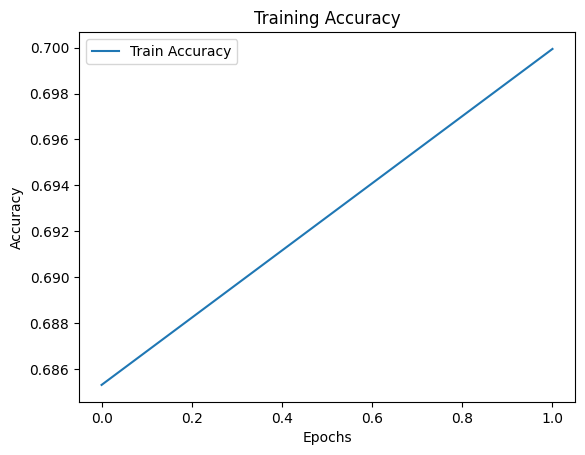

In [21]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2
import matplotlib.pyplot as plt
import os

# 1. Paths (Update this to your actual folder location)
train_dir = "C:/Users/saray/Downloads/butterfly project"
test_dir = "C:/Users/saray/Downloads/butterfly project"

# 2. Parameters
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32
AUTOTUNE = tf.data.AUTOTUNE

# 3. Load the data
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="categorical")

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="categorical")

# 4. Prefetch for performance
train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.prefetch(buffer_size=AUTOTUNE)

# 5. Define Model using MobileNetV2
base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # freeze weights

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(train_ds.element_spec[1].shape[1], activation='softmax')  # dynamic num_classes
])

# 6. Compile
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 7. Train
history = model.fit(train_ds, epochs=2)

# 8. Evaluate
loss, accuracy = model.evaluate(test_ds)
print(f"Test accuracy: {accuracy:.2f}")

# 9. Plot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')
plt.legend()
plt.show()

# 10. Save
model.save("butterfly_mobilenet_model.h5")
